In [38]:
#21BEC2292
#Vikalp Shukla
#Vellore Campus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('/content/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
data.shape

(344, 7)

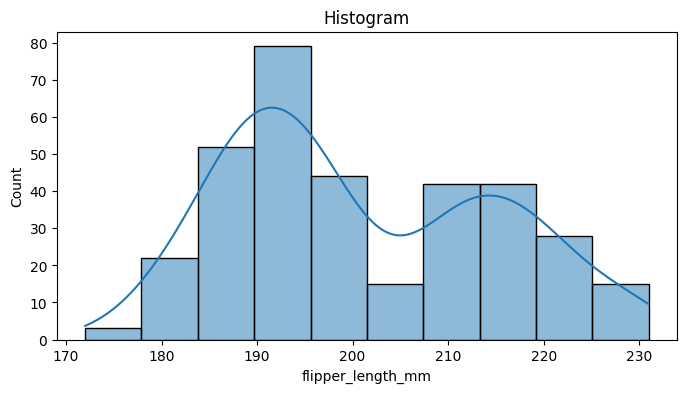

count    342.000000
mean     200.915205
std       14.061714
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64


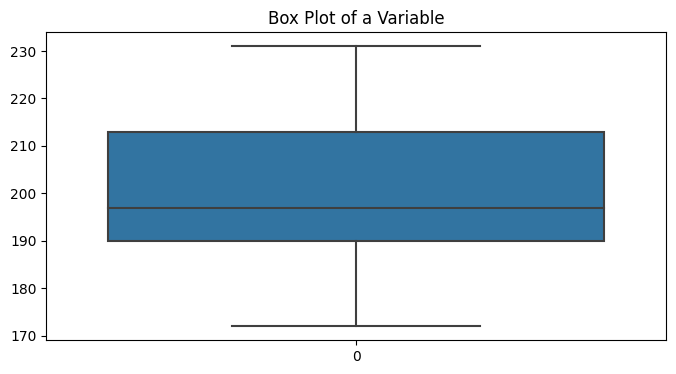

In [7]:
# Univariate:

# Example: Histogram
plt.figure(figsize=(8, 4))
sns.histplot(data['flipper_length_mm'], kde=True)
plt.title('Histogram')
plt.show()
summary_stats = data['flipper_length_mm'].describe()
print(summary_stats)

# Example: Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data['flipper_length_mm'])
plt.title('Box Plot of a Variable')
plt.show()

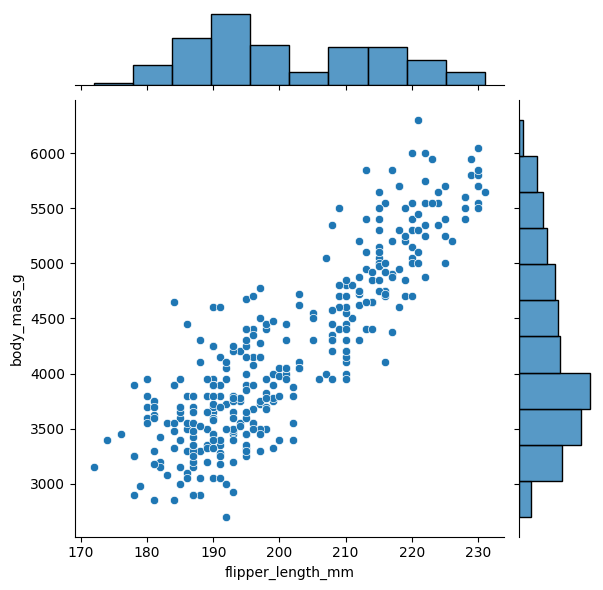

In [8]:
# Bivariate

# Example of a joint plot
sns.jointplot(x='flipper_length_mm', y='body_mass_g',data=data)

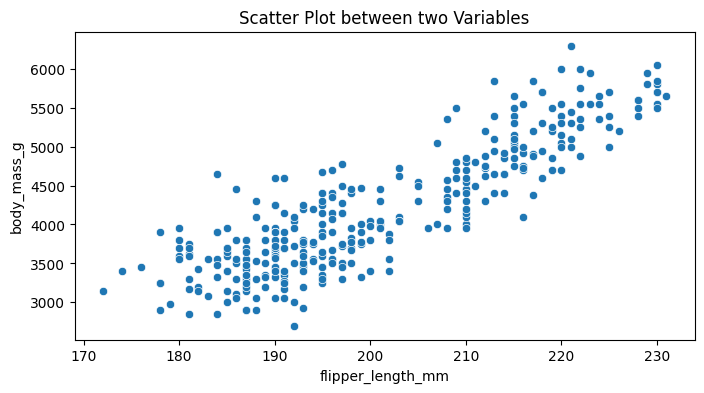

In [9]:
# Example of a scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x=data['flipper_length_mm'], y=data['body_mass_g'])
plt.title('Scatter Plot between two Variables')
plt.show()

<ipython-input-10-e5b5663328ce>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


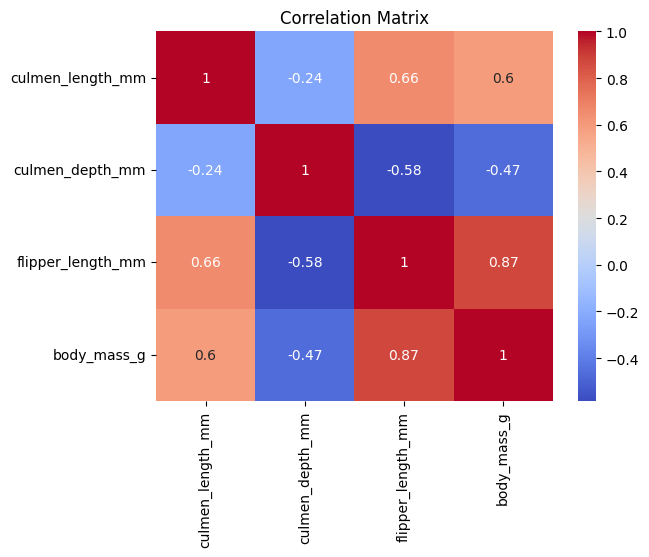

In [10]:
# Multivariate

# Correlation matrix
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

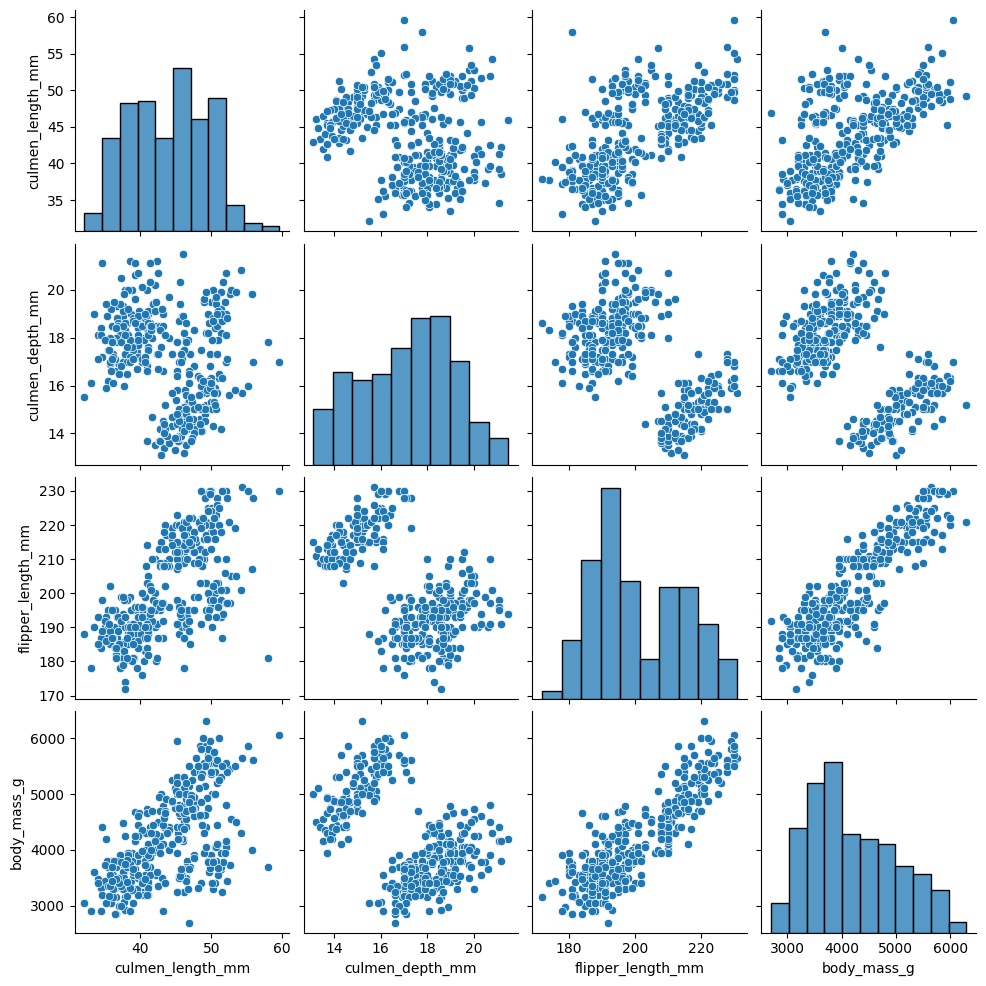

In [11]:
#Pair Plot
sns.pairplot(data)

In [13]:
# Descriptive analysis
descriptive_stats = data.describe()
print(descriptive_stats)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000


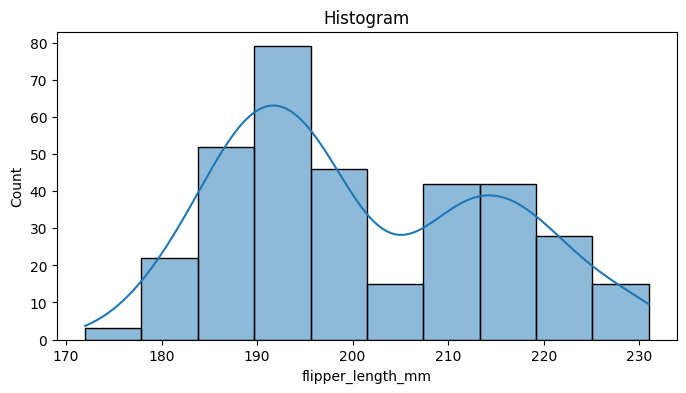

count    344.000000
mean     200.892442
std       14.023826
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64


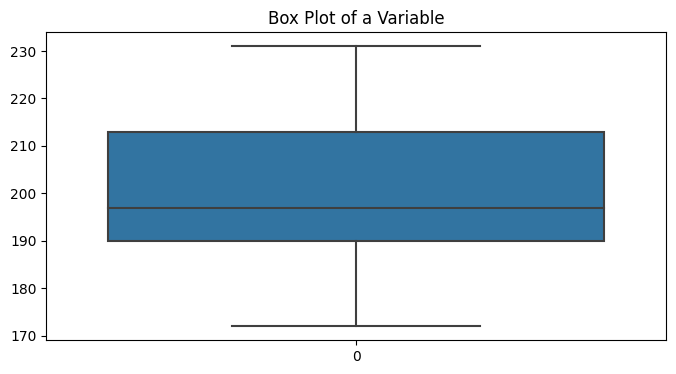

In [15]:
# Input missing values with the median of the column
data['flipper_length_mm'].fillna(data['flipper_length_mm'].median(), inplace=True)

# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(data['flipper_length_mm'], kde=True)
plt.title('Histogram')
plt.show()
summary_stats = data['flipper_length_mm'].describe()
print(summary_stats)

# Box plot
plt.figure(figsize=(8, 4))
sns.boxplot(data['flipper_length_mm'])
plt.title('Box Plot of a Variable')
plt.show()

In [22]:
# outlier detection
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<Axes: >

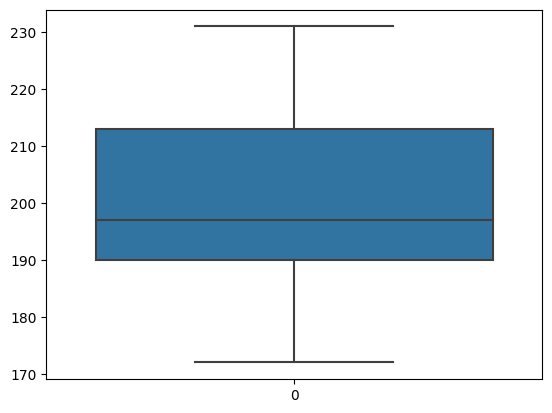

In [25]:
sns.boxplot(data.flipper_length_mm)

In [26]:
q1 = data.flipper_length_mm.quantile(0.25) #Q1
q3 = data.flipper_length_mm.quantile(0.75) #Q3

In [27]:
print(q1)
print(q3)

190.0
213.0


In [28]:
IQR = q3-q1
IQR

23.0

In [29]:
upper_limit = q3+1.5*IQR
upper_limit

247.5

In [30]:
lower_limit =q1-1.5*IQR
lower_limit

155.5

In [31]:
data.median()

<ipython-input-31-135339ac59ce>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


culmen_length_mm       44.45
culmen_depth_mm        17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

In [33]:
data['flipper_length_mm'] = np.where(data['flipper_length_mm']>upper_limit,30,data['flipper_length_mm'])

<Axes: >

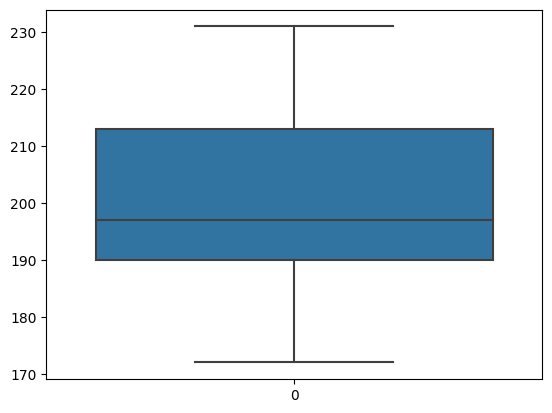

In [35]:
sns.boxplot(data.flipper_length_mm)

<ipython-input-36-b534b53362d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


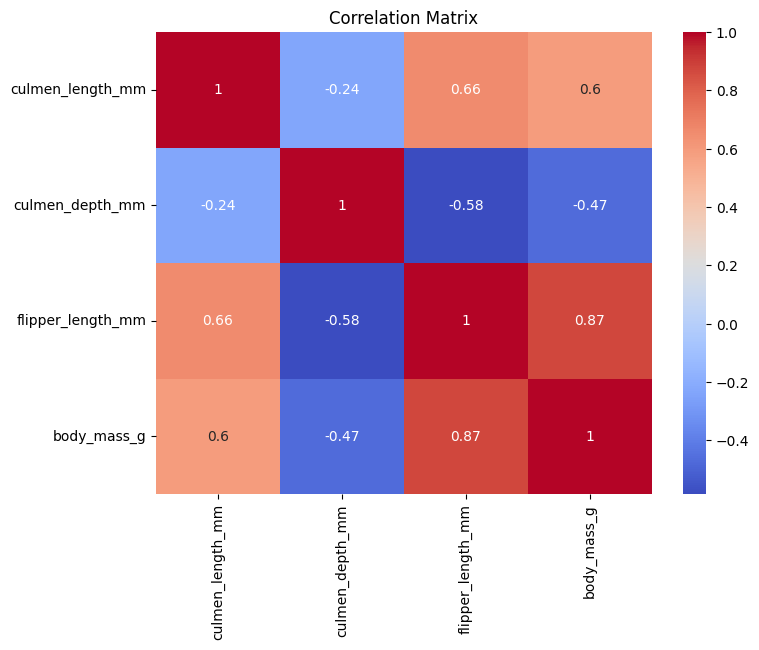

In [36]:
# Check the correlation of independent variables with the target
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [39]:
# Check for Categorical columns and perform encoding
# Assuming 'Island' and 'Sex' are categorical columns
label_encoder = LabelEncoder()
data['island'] = label_encoder.fit_transform(data['island'])
data['sex'] = label_encoder.fit_transform(data['sex'])

In [45]:
# Split the data into dependent and independent variables
X = data.drop('species', axis=1)  # Features
y = data['species']  # Target
X.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,2
1,2,39.5,17.4,186.0,3800.0,1
2,2,40.3,18.0,195.0,3250.0,1
3,2,NaN,NaN,NaN,NaN,3
4,2,36.7,19.3,193.0,3450.0,1


In [47]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()
X_scaled= pd.DataFrame(scale.fit_transform(X),columns =X.columns)
X_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,0.666667
1,1.0,0.269091,0.511905,0.237288,0.305556,0.333333
2,1.0,0.298182,0.583333,0.389831,0.152778,0.333333
3,1.0,NaN,NaN,NaN,NaN,1.000000
4,1.0,0.167273,0.738095,0.355932,0.208333,0.333333


In [56]:
#Spliting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

In [57]:
#Checking
X_train.shape

(240, 6)

In [54]:
y_train.shape

(240,)

In [55]:
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
258,0.0,0.432727,0.059524,0.610169,0.458333,0.333333
332,0.0,0.414545,0.250000,0.694915,0.541667,0.333333
121,1.0,0.203636,0.797619,0.440678,0.222222,0.666667
61,0.0,0.334545,0.952381,0.389831,0.472222,0.666667
70,1.0,0.050909,0.702381,0.305085,0.250000,0.333333
